In [131]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
from scipy import stats 
from scipy.stats import norm

[]

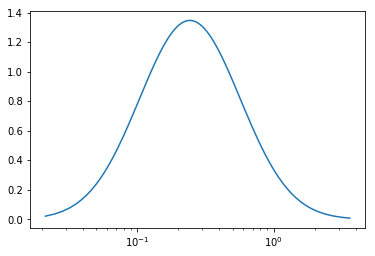

In [132]:
s,sc = 0.85,0.5
x = np.linspace(lognorm.ppf(0.0001,s,scale=sc),lognorm.ppf(0.99,s,scale=sc),1000)
data = lognorm.pdf(x,s,scale=sc)
mus = lognorm.ppf(np.linspace(0.0001,0.5,1000),s,scale=sc)
#print(data)
plt.plot(x, data)
plt.semilogx()

0.5 0.4994671988773602
0.43527528164806206 0.4347187445950327


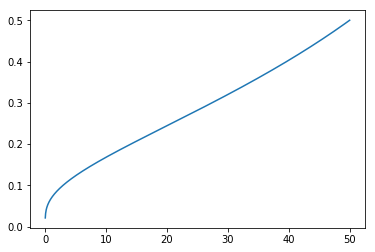

In [133]:
plt.plot(np.linspace(0,50,1000),mus)
phis = mus**1.2
mu1 = mus[-1]
mu2 =mus[-2]
print(mu1,mu2)
print(phis[-1],phis[-2])

In [138]:
print(mus)
print(phis)

[0.02118819 0.0318718  0.03704937 0.04081865 0.04388127 0.04650688
 0.04883095 0.05093229 0.05286118 0.05465193 0.05632909 0.05791089
 0.05941131 0.06084131 0.06220966 0.06352351 0.06478876 0.06601038
 0.06719255 0.06833884 0.06945235 0.07053576 0.07159143 0.07262142
 0.07362756 0.0746115  0.07557469 0.07651844 0.07744396 0.0783523
 0.07924445 0.0801213  0.08098367 0.0818323  0.08266789 0.08349107
 0.08430243 0.08510252 0.08589184 0.08667087 0.08744003 0.08819976
 0.08895041 0.08969237 0.09042596 0.09115151 0.09186931 0.09257964
 0.09328278 0.09397897 0.09466844 0.09535144 0.09602816 0.09669882
 0.0973636  0.09802269 0.09867627 0.09932449 0.09996752 0.10060551
 0.10123861 0.10186695 0.10249067 0.10310989 0.10372473 0.10433531
 0.10494174 0.10554414 0.10614259 0.1067372  0.10732808 0.10791529
 0.10849895 0.10907913 0.1096559  0.11022936 0.11079958 0.11136663
 0.11193059 0.11249151 0.11304947 0.11360454 0.11415676 0.11470622
 0.11525295 0.11579702 0.11633849 0.1168774  0.11741381 0.11794

In [135]:
eps1 = 0.4 #transfer efficiency for p1
eps2 = 0.3 #transfer efficiency for p2
m_p = 0.1 #producer mortality
m_c = 0.1 #consumer mortality


S_R = 0.5 #resource supply

#S_R = (m_p*m_c)/(eps1*phi1)

##dR = S_R - mu1*R*P1 - mu2*R*P2 #dR/dt
##dP1 = (mu1*R*P1) - (phi1*P1*C) - (m_p*P1) #dP1/dt
##dP2 = (mu2*R*P2) - (phi2*P2*C) - (m_p*P2) #dP2/dt
##dC = (eps1*phi1*P1*C)+(eps2*phi2*P2*C) - (m_c*C) #dC/dt

In [136]:
# differential  equation

##dR = S_R - mu1*R*P1 - mu2*R*P2 #dR/dt
def g(R):
    return S_R - (mus[-1]*R*P1[i-1]) - (mus[100]*R*P2[i-1])

##dP1 = (mu1*R*P1) - (phi1*P1*C) - (m_p*P1) #dP1/dt
def f(P1):
    return  (mus[-1]*R[i-1]*P1) - (phis[-1]*P1*C[i-1]) - (m_p*P1)

##dP2 = (mu2*R*P2) - (phi2*P2*C) - (m_p*P2) #dP2/dt
def j(P2):
    return  (mus[100]*R[i-1]*P2) - (phis[100]*P2*C[i-1]) - (m_p*P2)

##dC = (eps1*phi1*P1*C)+(eps2*phi2*P2*C) - (m_c*C) #dC/dt
def h(C):
    return (eps1*phis[-1]*P1[i-1]*C) + (eps2*phis[100]*P2[i-1]*C) - (m_c*C)


# define  initial  condition
P1_0 = 2
P2_0 = 2
R0 = 2
C0 = 2
# time  step
dt = 0.04
# time change (discrete time)
T = 100
t = np.linspace(0, T, int(T/dt))
# array  to store  the  solution
P1 = np.zeros(len(t))
P2 = np.zeros(len(t))
R = np.zeros(len(t))
C = np.zeros(len(t))
# Euler’s method
P1[0] = P1_0
P2[0] = P2_0
R[0] = R0
C[0] = C0
for i in  range(1, len(t)):
    P1[i] = P1[i-1] + f(P1[i -1])* dt
    P2[i] = P2[i-1] + j(P2[i -1])* dt
    R[i] = R[i-1] + g(R[i -1])* dt
    C[i] = C[i-1] + h(C[i -1])* dt

Text(0, 0.5, 'mmol C/ m^(3) day')

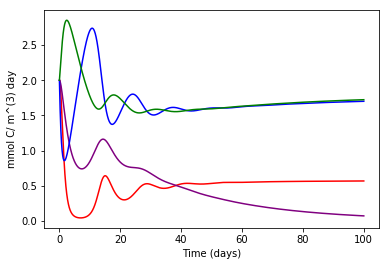

In [137]:
plt.figure()
plt.plot(t,P1, 'r')
plt.plot(t,P2, 'purple')
plt.plot(t,R,'b')
plt.plot(t,C, 'g')
plt.xlabel('Time (days)')
plt.ylabel('mmol C/ m^(3) day')